# Workbook 7: Difference in Difference model
This week we will be reviewing difference in difference model. 

These types of models are special class of panel models, therefore you must have panel data (in long form in Stata). A good way to describe these models is it examines "natural experiments" meaning it is trying to mimick experimental design without actually having complete reign over the data. Let us first briefy discuss experimental design.

In experimental design, you assess the treatment effect by having two groups: treatment group and control group (without treatment group). Theoretically, everything has to be similar between both groups. 

If you have an experimental design with panel data, you have two groups without treatment. Then, a treatment happens to only one group.

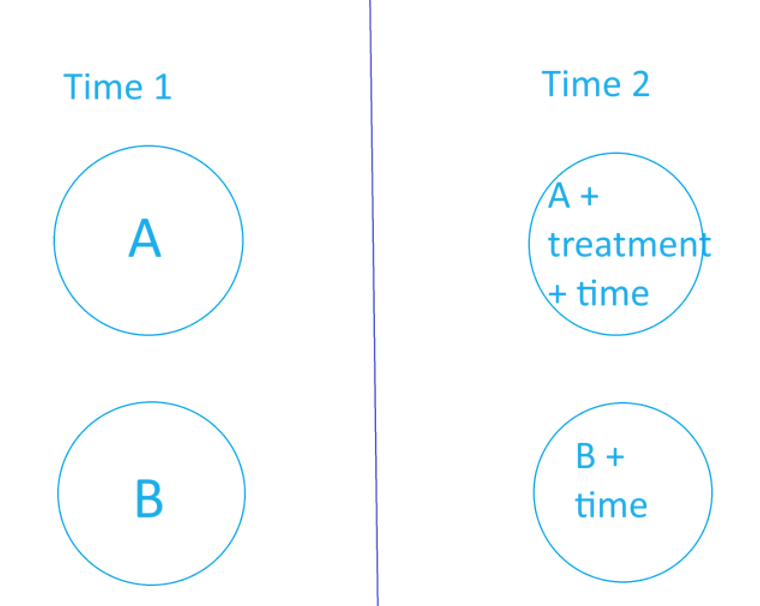

What is the panel part of this image? What is the experimental part of this image?

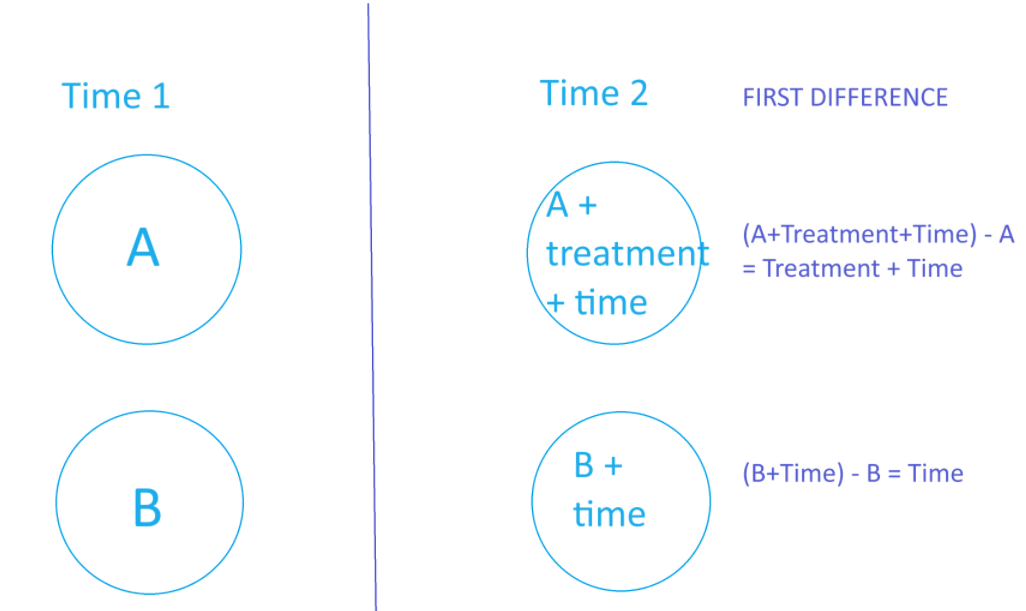

First difference get rid of the "unit-specific fixed effects" (413 Cunningham 2021).

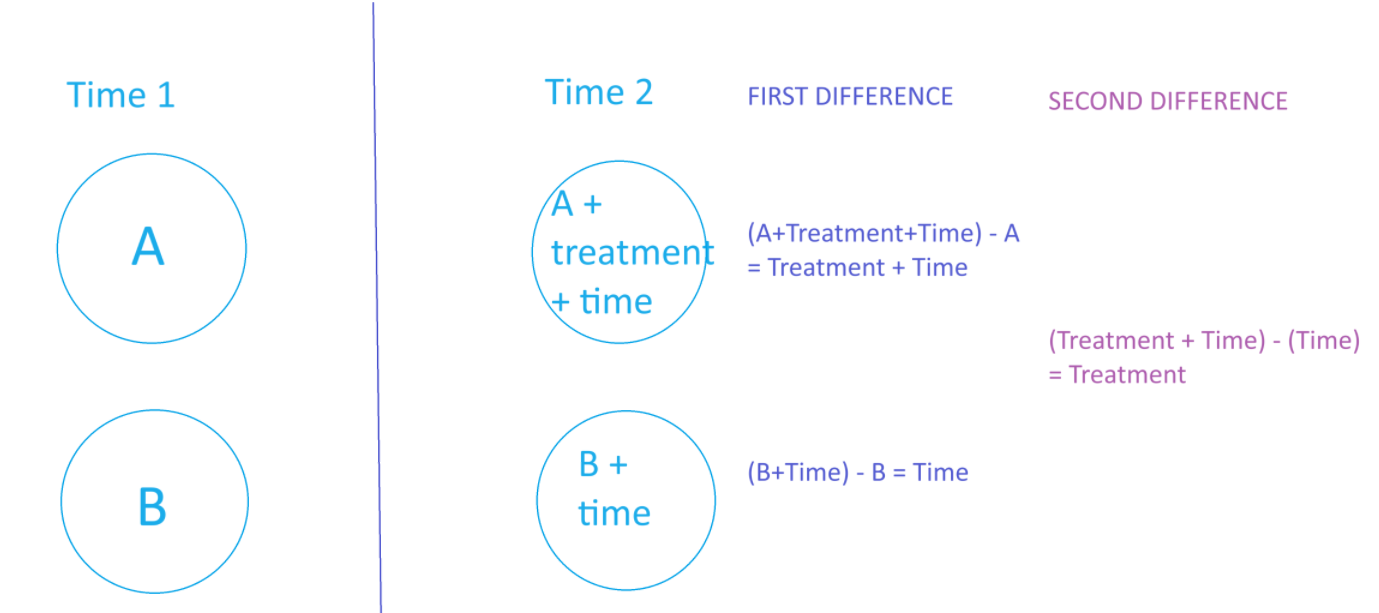

Second difference leaves us with treatment. 

One major assumption of this model is no temporal differences between the groups. In other words, if it was not for the treatment, these groups would have stayed the same trajectory (parallel slopes). 

## Now in the equation...
We can represent this through the special class of fixed models. This equation is assuming there are only two time periods

<center>$Y_{jt} = \beta_1*Treatment + \beta_2*Time + \beta_3*Treatment*Time + \beta*\theta_k + \epsilon_{st} $
    
$Y_{jt}$ is the outcome j group and t time
    
Includes a dummy variable for the treatment, time, and interaction with time and treatment.
    
$\beta*\theta_k$ is the array of other independent variables
    
$\epsilon_{st}$ is the errors

<b>The Average Treatment Effect</b> is the beta coefficient of Treatment and Time: $\beta_3*Treatment*Time$

Remember the trends should be similiar and you should check them.

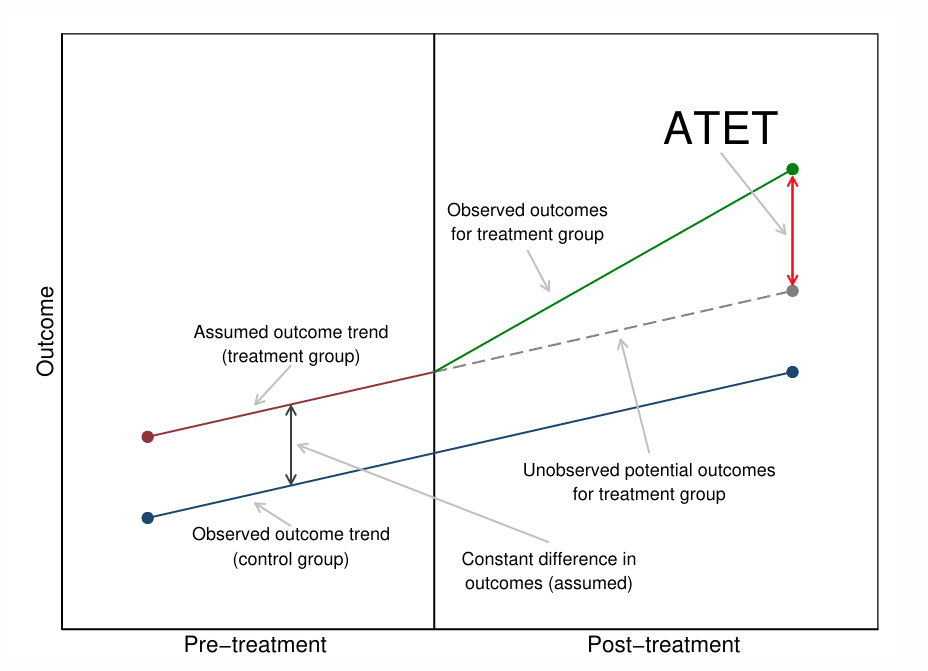

### Example from Causal Inference
Cunningham proposed that legalizing abortion would lead to lower STD cases because it would previous research shown legalizing abortion lead to lower risk behaviors like drugs and teen pregnancy. 

Here, the unit of analysis is Black female 15-19 years old. The treatment is repealing Roe (1973 but add 15 years+1973=1988). The outcome is gnorrhea rate.

In the text the author does it for every year, here I am simplfying it to only two years.

Data from CDC on gnorrhea incidence rate per 100,000.
* lnr is log gnorrhea rate
* repeal whether states is roe states and repeal states
* year is the year
* wm15 is white males 15-19 years old
* wf15  is white females 15-19 years old
* bm15  is Black males 15-19 years old
* bf15  is Black females 15-19 years old


D:\documents copy\research\Ongoing\BRAC\BRAC2\DD practice


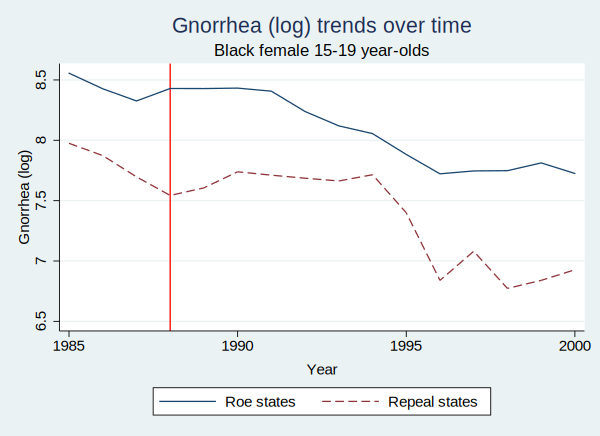

In [12]:
*setting up my directory
cd "D:\documents copy\research\Ongoing\BRAC\BRAC2\DD practice\"

use "abortion.dta", clear

collapse (mean) lnr, by(year bf15 repeal)

twoway ///
    (line lnr year if repeal==0 & bf15==1, lpattern(solid)) ///
    (line lnr year if repeal==1  & bf15==1, lpattern(dash)), ///
    ytitle(Gnorrhea (log)) ///
    xline(1988, lcolor(red)) ///
    xtitle(Year) ///
    xscale(titlegap(2)) ///
    title(Gnorrhea (log) trends over time) ///
    subtitle(Black female 15-19 year-olds) ///
    legend(order(1 "Roe states" 2 "Repeal states"))

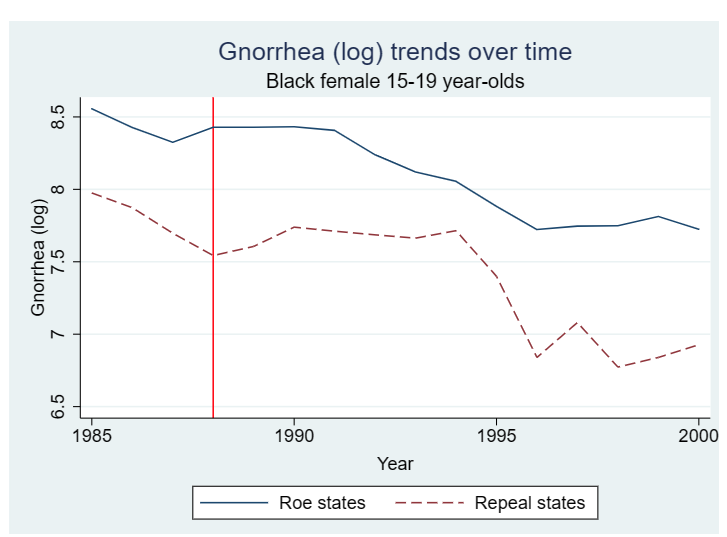

We see parrallel trends.

In [18]:
*setting up my directory
cd "D:\documents copy\research\Ongoing\BRAC\BRAC2\DD practice\"

use "abortion.dta", clear

*There is a longer verison of this in Causal Inference: A Mixtape, but I am simplfying it for learning purposes.
gen after1988=0
replace after1988=1 if year>=1988

collapse (mean) lnr, by(after1988 bf15 repeal)

keep if bf15==1

list


D:\documents copy\research\Ongoing\BRAC\BRAC2\DD practice



(15,912 real changes made)


(4 observations deleted)


     +-------------------------------------+
     | repeal   bf15   aft~1988        lnr |
     |-------------------------------------|
  1. |      0      1          0   8.430253 |
  2. |      1      1          0   7.848714 |
  3. |      0      1          1   8.053613 |
  4. |      1      1          1   7.347936 |
     +-------------------------------------+


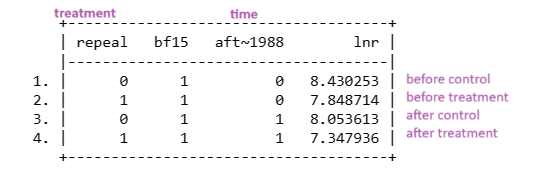

In [20]:
*after_treatment - before_treatment
di 7.347936-7.848714

*after_control - before_control
di 8.053613-8.430253

*treatment_diff - control_diff
di (7.347936-7.848714)-(8.053613-8.430253)


-.500778

-.37664

-.124138


In [5]:
*re-run data
cd "D:\documents copy\research\Ongoing\BRAC\BRAC2\DD practice\"

use "abortion.dta", clear

*There is a longer verison of this in Causal Inference: A Mixtape, but I am simplfying it for learning purposes.
gen after1988=0
replace after1988=1 if year>=1988

reg lnr i.repeal i.after1988 i.repeal#i.after1988 if bf15==1


D:\documents copy\research\Ongoing\BRAC\BRAC2\DD practice



(15,912 real changes made)


      Source |       SS           df       MS      Number of obs   =       737
-------------+----------------------------------   F(3, 733)       =     33.41
       Model |  49.5635652         3  16.5211884   Prob > F        =    0.0000
    Residual |  362.441228       733  .494462794   R-squared       =    0.1203
-------------+----------------------------------   Adj R-squared   =    0.1167
       Total |  412.004793       736  .559789121   Root MSE        =    .70318

------------------------------------------------------------------------------
         lnr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    1.repeal |  -.5815385    .192848    -3.02   0.003    -.9601388   -.2029382
 1.after1988 |  -.3766397   .0717067    -5.25   0.000    -.5174147   -.2358647
             |
      repeal#|
   after1

The average treatment effect is -.12 is negative and non-significant. 

In [7]:
di exp(-.124139)*100000

88325.706


Could say that repeal states have 88,326 lower gnorrhea as compared to roe states for Black females 15-19 years old. HOWEVER IT IS NOT SIGNIFICANT, not even close.

### Since this is regression, we can add control variables

In [11]:
reg lnr i.repeal i.after1988 i.repeal#i.after1988 i.fip acc ir pi alcohol crack poverty income ur if bf15==1 [aweight=totpop]

(sum of wgt is 43,100,087)
note: 53.fip omitted because of collinearity

      Source |       SS           df       MS      Number of obs   =       736
-------------+----------------------------------   F(60, 675)      =     45.69
       Model |  214.948648        60  3.58247747   Prob > F        =    0.0000
    Residual |  52.9281054       675  .078412008   R-squared       =    0.8024
-------------+----------------------------------   Adj R-squared   =    0.7849
       Total |  267.876754       735  .364458168   Root MSE        =    .28002

------------------------------------------------------------------------------
         lnr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    1.repeal |  -.7629252   .2009217    -3.80   0.000    -1.157432   -.3684186
 1.after1988 |   .0522664   .0444388     1.18   0.240    -.0349885    .1395214
             |
      repeal#|
   after1988 |
        1 1 

## Practice
* Using the same dataset, assess the effect of legalizing abortion on white women. Calculate manually and then check your answer with regression.